*Laboratorio di Simulazione Numerica- Cecilia Almagioni*

# Esercitazione 6

In questa esercitazione ho simulato un modello di Ising unidimensionale, confrontandone i risultati con la soluzione analitica: il modello di Ising 1D è infatti esattamente risolubile. 
\
Il modello rappresenta un sistema di $N$ spin che possono assumere valore $\pm 1$ e viene utilizzato per descrivere il comportamento dei sistemi magnetici a una dimensione. Se gli spin sono allineati il sistema è magnetizzato, altrimenti le fluttuazioni termiche prevalgono sull'interazione di coppie. 
\
L'interazione tra gli spin nel modello di avviene attraverso una semplice interazione di scambio tra spin vicini ed è descritta dalla seguente Hamiltoniana: 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove ho posto $\mu_B=1$ e $k_B=1$. Il primo termine rappresenta il contributo dell'interazione tra pirimi vicini mentre il secondo dell'interazione con un campo magnetico esterno $h$.

Il codice per questa esercitazione ci è stato fornito a lezione e simula il sistema di spin a temperatura fissa ta e costante $T$ (come abbiamo visto nell'esercitazione 7 questo corrisponde a dire che lavoriamo in un ensemble canonico) con due diversi algoritmi di campionamento del peso di Boltzmann $p({s_i})=exp(-\beta H)/Z$:

- campionamento di Metropolis;
- campionamento di Gibbs;

Entrambi consentono di campionare configurazioni di spin in base alle loro probabilità di occorrenza, permettendo di studiare il comportamento magnetico del sistema nel modello di Ising 1D e di ottenere informazioni sulle proprietà fisiche del sistema.

**Algoritmo di Metropolis**

L'algoritmo di Metropolis permette di campionare configurazioni di spin in base alla loro probabilità di occorrenza, tenendo conto dell'energia del sistema e della temperatura. In questa esercitazione funziona nel seguente modo:
- si parte da una configurazione iniziale casuale degli spin sulla catena;
- si seleziona casualmente uno spin sulla catena e si propone di modificarne l'orientazione;
- si calcola l'energia del sistema prima e dopo la modifica proposta;
- si calcola la differenza di energia tra le due configurazioni e si decide se accettare o rigettare la mossa in base a una regola probabilistica. Se la differenza di energia è negativa, la mossa viene accettata. Se la differenza di energia è positiva, la mossa viene accettata con una probabilità dipendente dalla temperatura del sistema e dalla differenza di energia. Dunque la probabilità è: $A(b|a)=min[1, e^{-\beta\Delta E}]$;
- se la mossa viene accettata, si aggiorna la configurazione degli spin. Altrimenti, si mantiene la configurazione precedente.

Si ripetono gli step precedenti per un numero sufficiente di iterazioni, permettendo al sistema di esplorare diverse configurazioni di spin in base alle probabilità di accettazione.


**Algoritmo di Gibbs**

Diversamente dall'algoritmo di Metropolis, l'algoritmo di Gibbs campiona le configurazioni di spin uno spin alla volta, tenendo conto delle probabilità condizionate delle diverse configurazioni possibili. Allplicato al mio problema funziona in questo modo: 

- si parte da una configurazione iniziale casuale degli spin sulla catena;
- si seleziona casualmente uno spin sulla catena e si calcola l'energia del sistema se quello spin è su oppure giù indipendentemente da suo stato precedente;
- si impone lo spin up con probabilità  $p({s_i})=\frac{1}{1+\exp(-\beta\Delta E)}$ dove $\Delta E$ è la differenza tra l'energia del sistema se lo spin selezionato giù e se lo spin è su;

L'algoritmo di Gibbs permette di ottenere un campionamento diretto delle configurazioni di spin, senza la necessità di accettare o rigettare mosse come nell'algoritmo di Metropolis. Ciò rende l'algoritmo di Gibbs particolarmente utile per simulazioni in cui è richiesta una maggiore efficienza computazionale.



### Esercizio 6.1

Il codice fornito è in grado di calcolare l'energia interna: $U(N,T) = \langle H \rangle$. Ho dunque aggiunto il calcolo di$C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ è ho calcolato:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di T nel range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con $J=1$.


**Equilibrazione - energia interna**

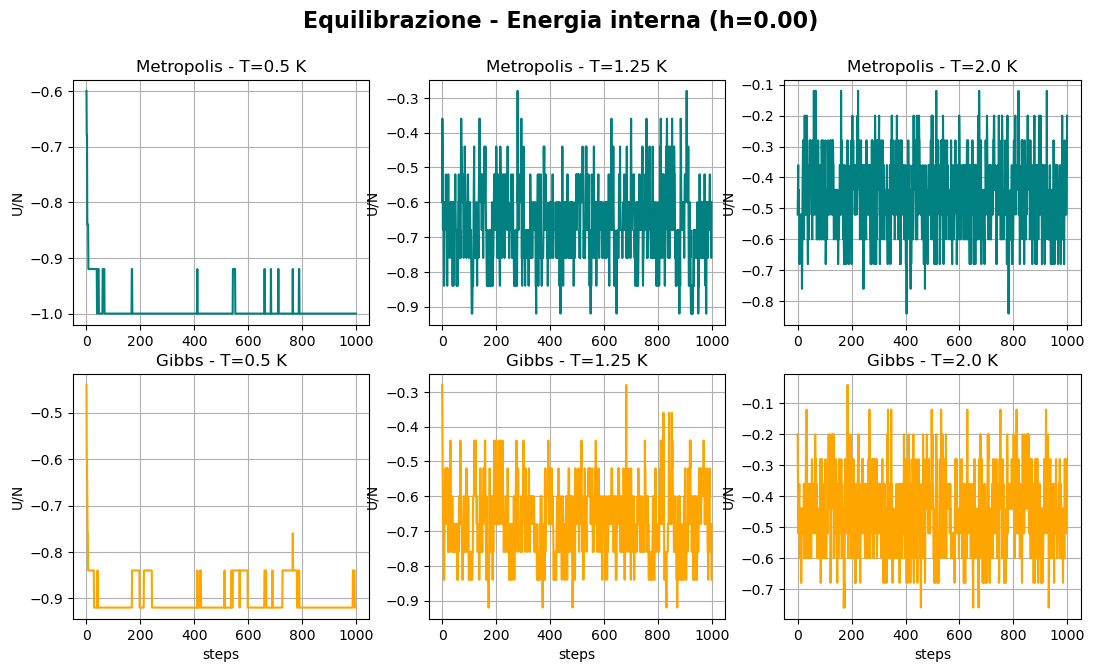

In [114]:
import matplotlib.pyplot as plt
import numpy as np


uM05 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_M05",unpack=True,usecols=(1))
uM125 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_M125",unpack=True,usecols=(1))
uM20 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_M20",unpack=True,usecols=(1))
uG05 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_G05",unpack=True,usecols=(1))
uG125 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_G125",unpack=True,usecols=(1))
uG20 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/Eq/eq_ene_G20",unpack=True,usecols=(1))

x = np.arange(uM05.size)

plt.figure(figsize=(13,7))
plt.suptitle('Equilibrazione - Energia interna (h=0.00)',fontweight='bold',fontsize=16)

plt.subplot(231)
plt.plot(x,uM05, color='teal')
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=0.5 K')

plt.subplot(232)
plt.plot(x,uM125, color='teal')
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=1.25 K')

plt.subplot(233)
plt.plot(x,uM20, color='teal')
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=2.0 K')

plt.subplot(234)
plt.plot(x,uG05,color='orange')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=0.5 K')

plt.subplot(235)
plt.plot(x,uG125,color='orange')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=1.25 K')

plt.subplot(236)
plt.plot(x,uG20,color='orange')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=2.0 K')

plt.show()

A $T=0.5K$ il sistema rimane fermo per un gran numero di passi. Comunque anche per questa temperatura il sistema sembra essere equilibrato dopo $1000$ passi. 
\
Per questo motivo ho aggiunto nel codice $1000$ step di equilibrazione prima di procedere con il calcolo delle grandezze in interesse. 
\
Dopo l'equilibrazione, ho calcolato le varie grandezze impostando $M=40000$ suddiviso in $N=20$ blocchi da $2000$ step ciascuno. 
\
Per il calcolo ho campionato $T\in[0, 2.5]$ con $\Delta T=0.25$. Per poter plottare agilmente i valori finali del data blocking, ho aggiunto una funzione `PrintFinal`.

### Energia interna

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}$$

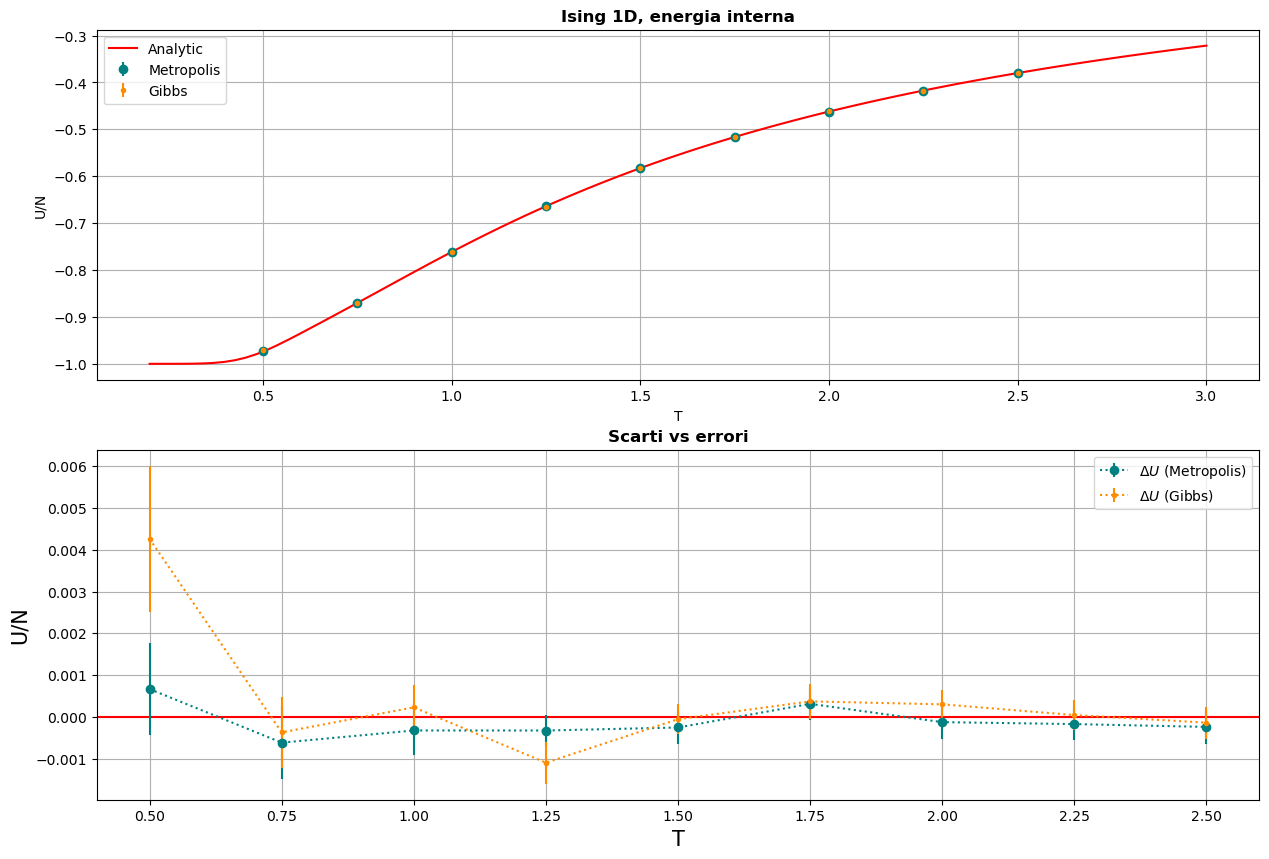

In [115]:
import numpy as np
import matplotlib.pyplot as plt

TM, UM, errM = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/EneTM",unpack=True)
TG, UG, errG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/EneTG",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0 #en minima è -1
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#discrete

th_d = np.tanh(J/TM)
thN_d= th_d**Ns
ch_d = 1/th_d
e_d = -J*( th_d + ch_d*thN_d )/( 1 + thN_d )

plt.figure(figsize=(15,10))


plt.subplot(2,1,1)
plt.errorbar(TM, UM, errM, fmt = 'o', color ='teal', label='Metropolis')
plt.errorbar(TG, UG, errG, fmt = '.', color ='darkorange', label='Gibbs')

plt.plot(T, e, color='r', label='Analytic')
plt.title('Ising 1D, energia interna', fontweight='bold')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Scarti vs Errori', fontweight='bold')
plt.axhline(y=0, color='r')
plt.errorbar(TM, UM-e_d, yerr = errM, marker='o', linestyle = "dotted", label="$\Delta U$ (Metropolis)", color = "teal")
plt.errorbar(TM, UG-e_d, yerr = errG, marker='.', linestyle = "dotted", label="$\Delta U$ (Gibbs)", color = "darkorange") 
plt.title("Scarti vs errori", fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.grid(True)
plt.legend()


plt.show()

### Capacità termica

$$
C(N,T) = 
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$


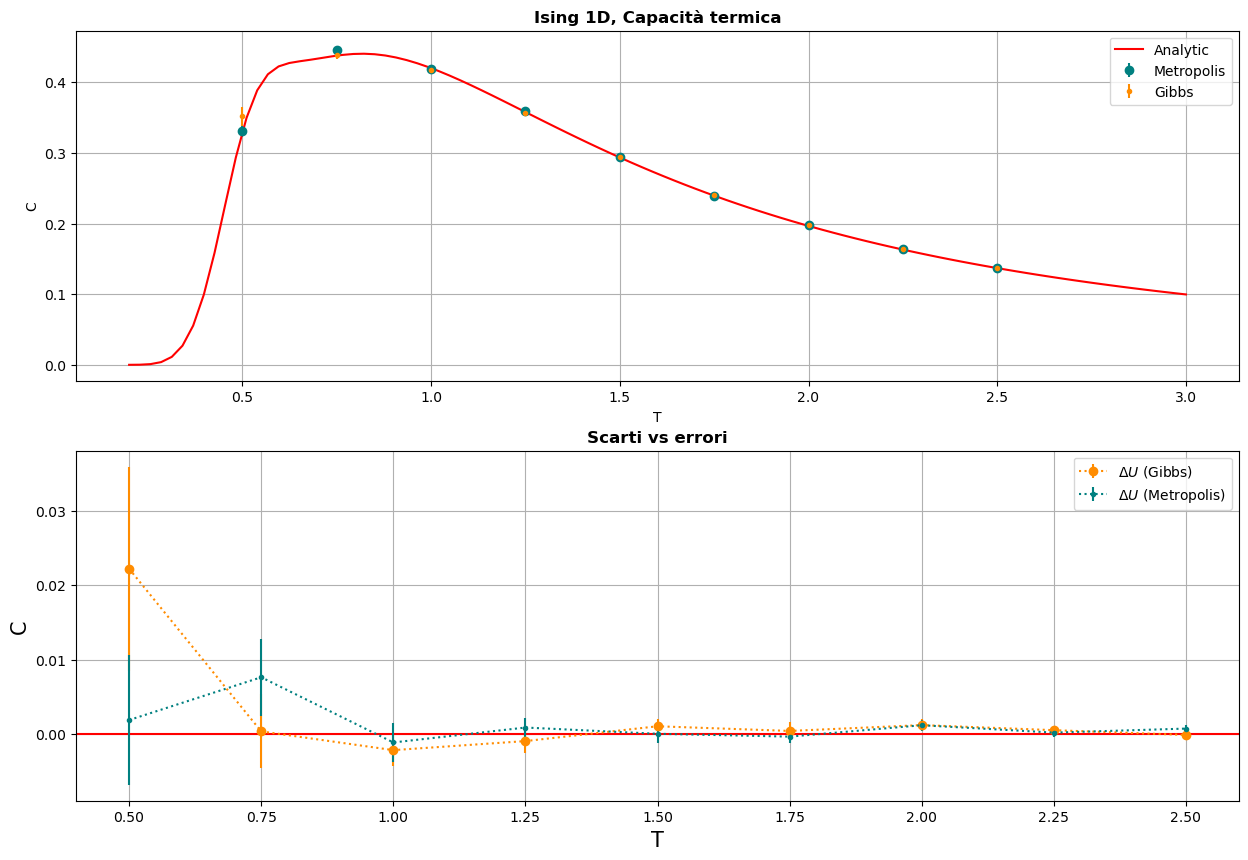

In [116]:
import numpy as np
import matplotlib.pyplot as plt

TM, CM, errM = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/HeatTM",unpack=True)
TG, CG, errG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/HeatTG",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0 #en minima è -1
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#discrete

th_d = np.tanh(J/TM)
thN_d= th_d**Ns
ch_d = 1/th_d
heat_d=((1/TM*J)**2)*(((1+thN_d+(Ns-1)*(th_d**2)+(Ns-1)*(ch_d**2)*thN_d)/(1+thN_d))-Ns*((th_d+ch_d*thN_d)/(1+thN_d))**2)


plt.figure(figsize=(15,10))


plt.subplot(2,1,1)
plt.errorbar(TM, CM, errM, fmt = 'o', color='teal', label='Metropolis')
plt.errorbar(TG, CG, errG, fmt = '.', color='darkorange',label='Gibbs')

plt.plot(T, heat, color='r', label='Analytic')
plt.title('Ising 1D, Capacità termica', fontweight='bold')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)


plt.subplot(2,1,2)
plt.title('Scarti vs Errori', fontweight='bold')
plt.axhline(y=0, color='r')
plt.errorbar(TM, CG-heat_d, yerr = errG, marker='o', linestyle = "dotted", label="$\Delta U$ (Gibbs)", color = "darkorange")
plt.errorbar(TM, CM-heat_d, yerr = errM, marker='.', linestyle = "dotted", label="$\Delta U$ (Metropolis)", color = "teal") 
plt.title("Scarti vs errori", fontweight = "bold")
plt.ylabel('C',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.grid(True)
plt.legend()

plt.show()

### Suscettività magnetica

$$
\chi(N,T) \underset{h=0}=\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] 
$$

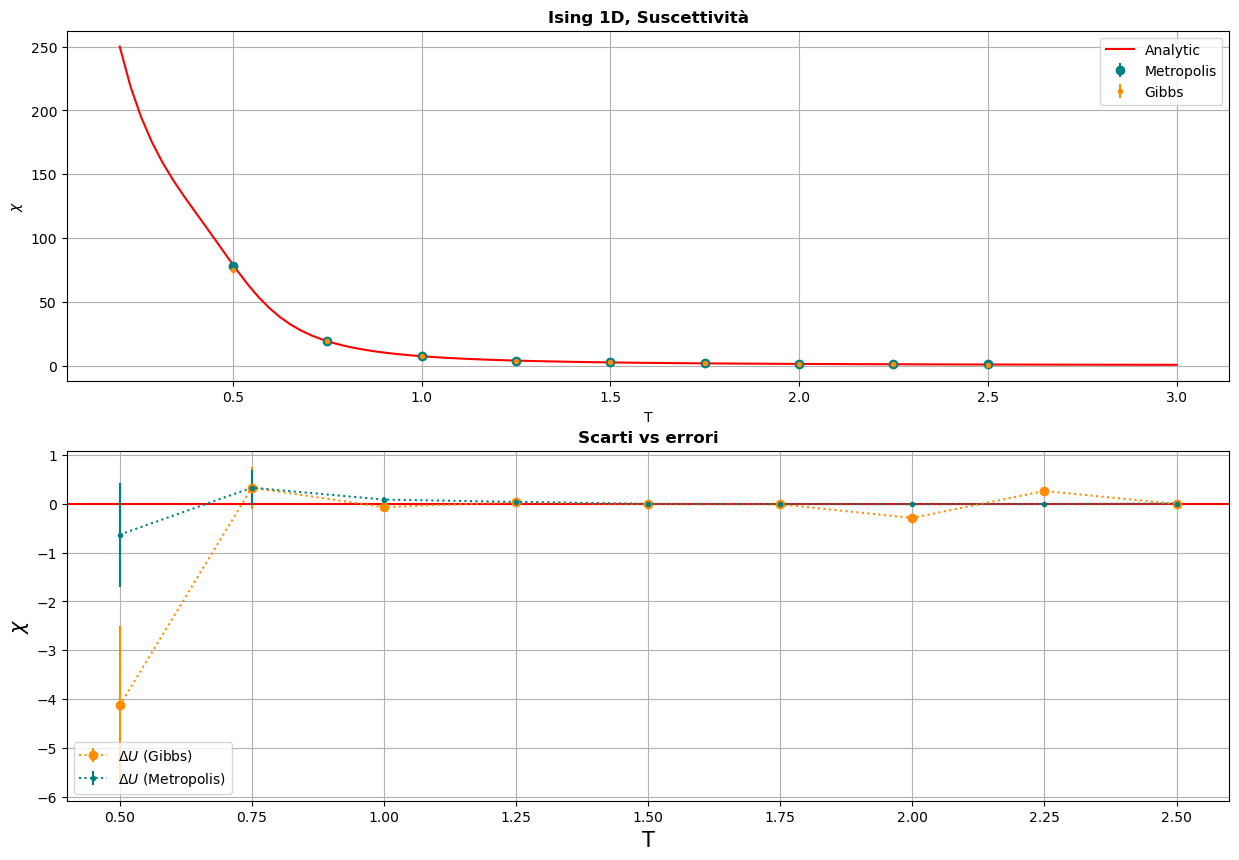

In [117]:
import numpy as np
import matplotlib.pyplot as plt

TM, ChiM, errM = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/ChiTM",unpack=True)
TG, ChiG, errG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/ChiTG",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0 #en minima è -1
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#discreto

th_d = np.tanh(J/TM)
thN_d= th_d**Ns
ch_d = 1/th_d
X_d = (1/TM)*np.exp(2*(1/TM)*J)*(1-thN_d)/(1+thN_d)


plt.figure(figsize=(15,10))


plt.subplot(2,1,1)
plt.errorbar(TM, ChiM, errM, fmt = 'o', color='teal', label='Metropolis')
plt.errorbar(TG, ChiG, errG, fmt = '.', color='darkorange', label='Gibbs')

plt.plot(T, X, color='r', label='Analytic')
plt.title('Ising 1D, Suscettività', fontweight='bold')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Scarti vs Errori', fontweight='bold')
plt.axhline(y=0, color='r')
plt.errorbar(TM, ChiG-X_d, yerr = errG, marker='o', linestyle = "dotted", label="$\Delta U$ (Gibbs)", color = "darkorange")
plt.errorbar(TM, ChiM-X_d, yerr = errM, marker='.', linestyle = "dotted", label="$\Delta U$ (Metropolis)", color = "teal") 
plt.title("Scarti vs errori", fontweight = "bold")
plt.ylabel('$\chi$',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.grid(True)
plt.legend()


plt.show()

### Magnetizzazione

$$
M(N,T,h)  = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

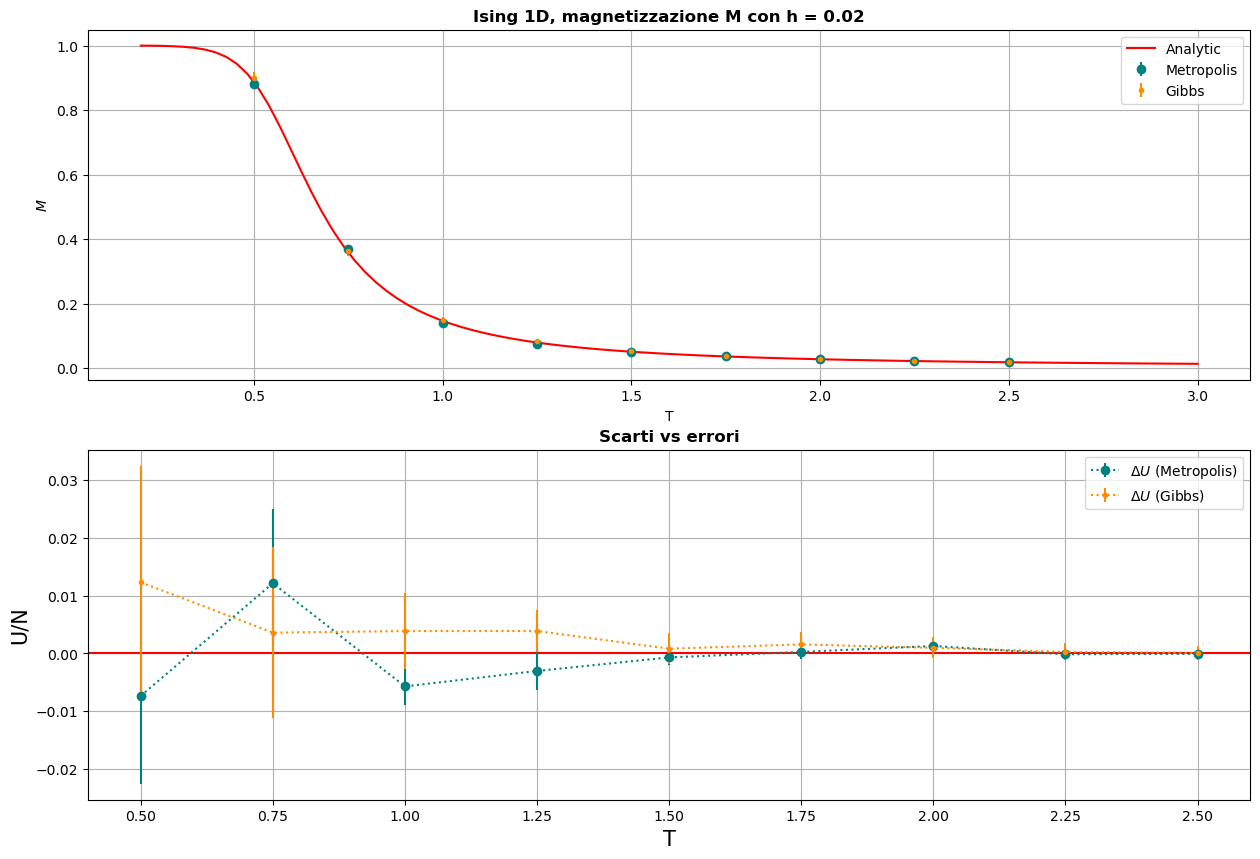

In [118]:
import numpy as np
import matplotlib.pyplot as plt

TM, MM, errM = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/MagTM",unpack=True)
TG, MG, errG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es06/ISING_1D/MagTG",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0 #en minima è -1
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#discrete

h_d = np.tanh(J/TM)
thN_d= th_d**Ns
ch_d = 1/th_d
h=0.02 
b = 1/TM
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_d = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.errorbar(TM, MM, errM, fmt='o', color='teal',label='Metropolis')
plt.errorbar(TG, MG, errG, fmt='.', color='darkorange',label='Gibbs')

plt.plot(T, M, color='r', label ='Analytic')
plt.title('Ising 1D, magnetizzazione M con h = 0.02', fontweight='bold')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)


plt.subplot(2,1,2)
plt.title('Scarti vs Errori', fontweight='bold')
plt.axhline(y=0, color='r')
plt.errorbar(TM, MM-M_d, yerr = errM, marker='o', linestyle = "dotted", label="$\Delta U$ (Metropolis)", color = "teal")
plt.errorbar(TM, MG-M_d, yerr = errG, marker='.', linestyle = "dotted", label="$\Delta U$ (Gibbs)", color = "darkorange") 
plt.title("Scarti vs errori", fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.grid(True)
plt.legend()

plt.show()



**Osservazioni finali**

A $T=0.5K$ l'algoritmo di Gibbs non risulta efficace nel calcolare $U/N$, $C$, e $\chi$ dato che i risultati non sono statisticamente compatibili con la soluzione analitica. Si potrebbe provare ad aumentare il numero di steps per blocco.
\
A tutte le altre $T$ invece i risultati sono ottimi, sempre compatibili tra di loro (Gibbs e Metropolis) che con la soluzione analitica.